In [2]:
# # Import libraries
import numpy as np
import demes, demesdraw
import msprime as ms
import moments,moments.LD
import matplotlib.pylab as plt
import matplotlib


In [3]:
def get_crt(demes_model,pop,T=None):
    """
    Returns two arrays: the Coalescence rate and the Inferred Inverse Coalescence Rate (Popsize)
    """
    m = ms.Demography.from_demes(demes_model)
    debug = m.debug()
    if T == None:
        T = np.concatenate([
            np.linspace(0, 1000, 2001),
            np.linspace(1000, 1.0e4, 401)[1:]
        ])
    R, _ = debug.coalescence_rate_trajectory(T, {pop: 2})
    inversed_R = 1/(2*R)

    return R,inversed_R,T

def get_crt_croosspop(demes_model,pop1,pop2,T=None):
    """
    Returns two arrays: the Coalescence rate and the Inferred Inverse Coalescence Rate (Popsize)
    """
    m = ms.Demography.from_demes(demes_model)
    debug = m.debug()
    if T == None:
        T = np.concatenate([
            np.linspace(0, 1000, 2001),
            np.linspace(1000, 1.0e4, 401)[1:]
        ])
    R, _ = debug.coalescence_rate_trajectory(T, {pop1: 2,pop2: 2})
    inversed_R = 1/(2*R)

    return R,inversed_R,T


In [7]:
N_ancestral = 20e3

In [5]:
font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

#### Growth and Split

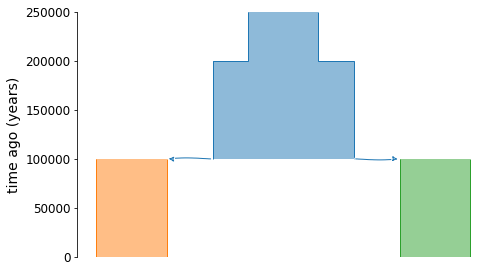

In [7]:
### Growth and split
mgs = demes.Builder(time_units="years",generation_time=29)
mgs.add_deme("Ancestral",epochs=[dict(start_size=N_ancestral, end_time=200e3),dict(start_size=N_ancestral*2,end_time=100e3)])
mgs.add_deme("Split1",ancestors=["Ancestral"],start_time=100e3,epochs=[dict(start_size=N_ancestral)])
mgs.add_deme("Split2",ancestors=["Ancestral"],start_time=100e3,epochs=[dict(start_size=N_ancestral)])

mgs_g = mgs.resolve()
p = demesdraw.tubes(mgs_g, log_time=False, num_lines_per_migration=3,max_time=250e3,labels=None)
p.tick_params(labelsize=12)
p.yaxis.get_label().set_fontsize(14)
p.figure.savefig("growth_split.pdf")

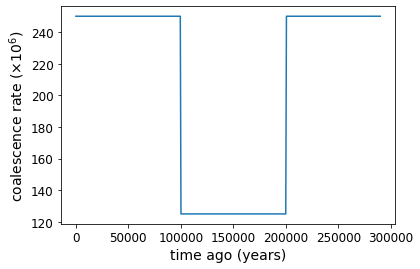

In [8]:
mgs_R,_,T = get_crt(mgs_g,"Split1")

plt.plot(T*29, mgs_R*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);
plt.savefig("growth_split_R.pdf")


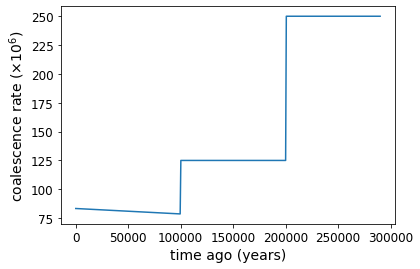

In [9]:
mgs_R_cp,_,T = get_crt_croosspop(mgs_g,"Split1","Split2")

plt.plot(T*29, mgs_R_cp*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);
plt.savefig("growth_split_R_cp.pdf")

#### Structure,merge,split, symmetrical

In [10]:
cmap = matplotlib.cm.get_cmap("tab10")

In [ ]:
#new_colours = {deme.name: cmap(j) for j, deme in enumerate(msms_g.demes)}

In [8]:
# Changing colors
colors = {'Ancestral': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765,
  1.0),
  'Split1':(0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
  'Split2': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354,
  1.0),
  'Merge': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
  'Split_11': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
  'Split_12': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)}

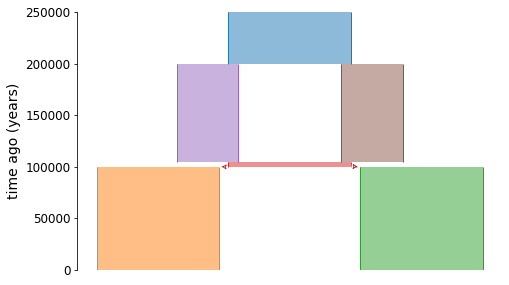

In [9]:
### Structure, merge and split, symmetrical
msms = demes.Builder(time_units="years",generation_time=29)
msms.add_deme("Ancestral",epochs=[dict(start_size=N_ancestral, end_time=200e3)])
msms.add_deme("Split1",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral/2,end_time=105e3)])
msms.add_deme("Split2",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral/2,end_time=105e3)])
msms.add_deme("Merge",ancestors=["Split1","Split2"],proportions=[0.5,0.5],start_time=105e3,epochs=[dict(start_size=N_ancestral,end_time=100e3)])
msms.add_deme("Split_11",ancestors=["Merge"],start_time=100e3,epochs=[dict(start_size=N_ancestral)])
msms.add_deme("Split_12",ancestors=["Merge"],start_time=100e3,epochs=[dict(start_size=N_ancestral)])

msms_g = msms.resolve()
p = demesdraw.tubes(msms_g, log_time=False, num_lines_per_migration=3,max_time=250e3,labels=None,colours=colors)

p.tick_params(labelsize=12)
p.yaxis.get_label().set_fontsize(14)

p.figure.savefig("split_merge_split.pdf")

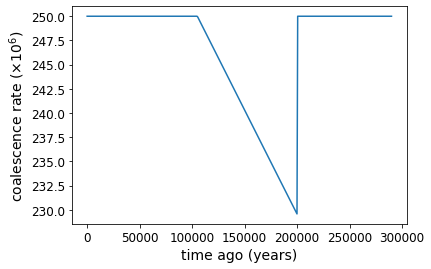

In [24]:
msms_R,_,T = get_crt(msms_g,"Split_11")

plt.plot(T*29, (msms_R*10e6))

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);
plt.savefig("split_merge_split_R.pdf",bbox_inches = 'tight')

In [ ]:
type()

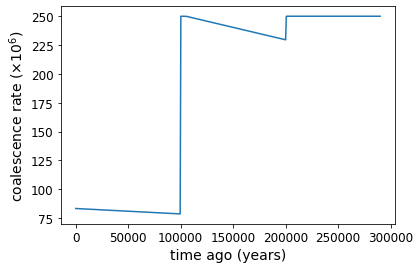

In [19]:
msms_R_cp,_,T = get_crt_croosspop(msms_g,"Split_11","Split_12")

plt.plot(T*29, msms_R_cp*10e6)

plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);

plt.savefig("split_merge_split_R_cp.pdf")

#### Structure, merge and split

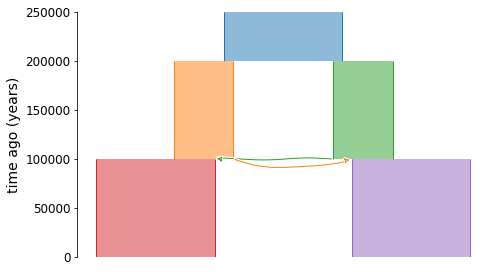

In [17]:
### Structure, merge and split
from cProfile import label


mms = demes.Builder(time_units="years",generation_time=29)
mms.add_deme("Ancestral",epochs=[dict(start_size=N_ancestral, end_time=200e3)])
mms.add_deme("Split1",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral/2,end_time=100e3)])
mms.add_deme("Split2",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral/2,end_time=100e3)])
mms.add_deme("Mix1",ancestors=["Split1","Split2"],proportions=[0.6,0.4],start_time=100e3,epochs=[dict(start_size=N_ancestral)])
mms.add_deme("Mix2",ancestors=["Split1","Split2"],proportions=[0.4,0.6],start_time=100e3,epochs=[dict(start_size=N_ancestral)])

mms_g = mms.resolve()
p = demesdraw.tubes(mms_g, log_time=False, num_lines_per_migration=3,max_time=250e3,labels=None)
p.tick_params(labelsize=12)
p.yaxis.get_label().set_fontsize(14)

p.figure.savefig("split_mix.pdf")

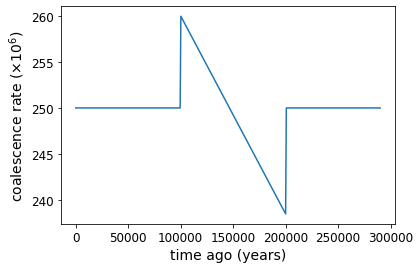

In [18]:
mms_R,_,T = get_crt(mms_g,"Mix1")

plt.plot(T*29, mms_R*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);

plt.savefig("split_mix_R.pdf")

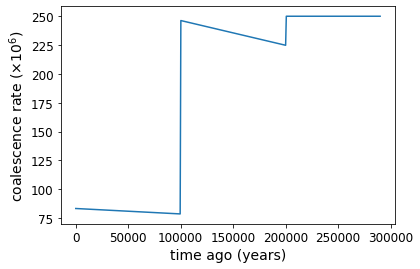

In [19]:
mms_R_cp,_,T = get_crt_croosspop(mms_g,"Mix1","Mix2")

plt.plot(T*29, mms_R_cp*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);


plt.savefig("split_mix_R_cp.pdf")

#### Structure, merge and split, symmetrical

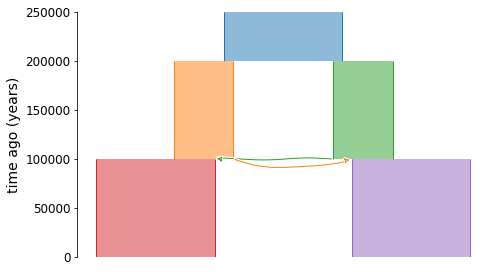

In [20]:
### Structure, merge and split, symmetrical
mmss = demes.Builder(time_units="years",generation_time=29)
mmss.add_deme("Ancestral",epochs=[dict(start_size=N_ancestral, end_time=200e3)])
mmss.add_deme("Split1",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral/2,end_time=100e3)])
mmss.add_deme("Split2",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral/2,end_time=100e3)])
mmss.add_deme("Mix1",ancestors=["Split1","Split2"],proportions=[0.5,0.5],start_time=100e3,epochs=[dict(start_size=N_ancestral)])
mmss.add_deme("Mix2",ancestors=["Split1","Split2"],proportions=[0.5,0.5],start_time=100e3,epochs=[dict(start_size=N_ancestral)])

mmss_g = mmss.resolve()
p = demesdraw.tubes(mmss_g, log_time=False, num_lines_per_migration=3,max_time=250e3,labels=None)

p.tick_params(labelsize=12)
p.yaxis.get_label().set_fontsize(14)

p.figure.savefig("split_mix_symm.pdf")

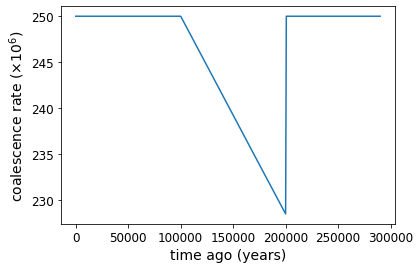

In [21]:
mmss_R,_,T = get_crt(mmss_g,"Mix1")

plt.plot(T*29, mmss_R*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);


plt.savefig("split_mix_symm_R.pdf")

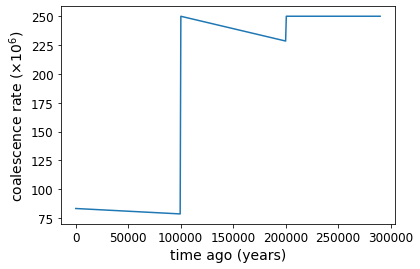

In [22]:
mmss_R_cp,_,T = get_crt_croosspop(mmss_g,"Mix1","Mix2")

plt.plot(T*29, mmss_R_cp*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);

plt.savefig("split_mix_symm_R_cp.pdf")

#### Deep split with migration until 100k

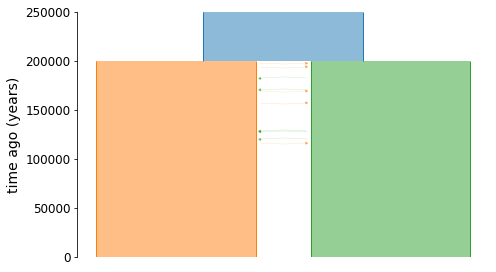

In [23]:
### Deep split with migration that stops at 100k before the present
mdsm = demes.Builder(time_units="years",generation_time=29)
mdsm.add_deme("Ancestral",epochs=[dict(start_size=N_ancestral, end_time=200e3)])
mdsm.add_deme("Split1",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral)])
mdsm.add_deme("Split2",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral)])
mdsm.add_migration(rate=1e-4,demes = ['Split1','Split2'],end_time=100e3)

mdsm_g = mdsm.resolve()
p = demesdraw.tubes(mdsm_g, log_time=False, num_lines_per_migration=5,labels=None)

p.tick_params(labelsize=12)
p.yaxis.get_label().set_fontsize(14)

p.figure.savefig("Deep_split_migration.pdf")

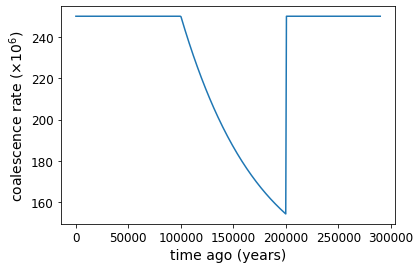

In [24]:
mdsm_R,_,T = get_crt(mdsm_g,"Split1")

plt.plot(T*29, mdsm_R*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);

plt.savefig("Deep_split_migration_R.pdf")

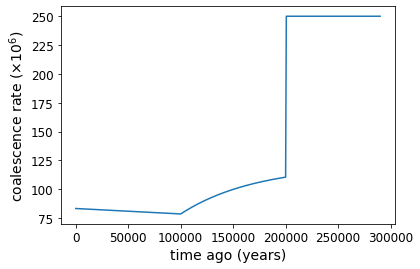

In [25]:
mdsm_R_cp,_,T = get_crt_croosspop(mdsm_g,"Split1","Split2")

plt.plot(T*29, mdsm_R_cp*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);

plt.savefig("Deep_split_migration_R_cp.pdf")

#### Split at 100k

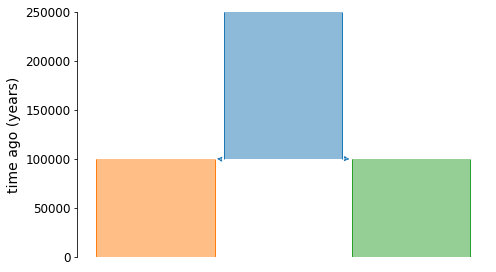

In [26]:
### Split at 100k
mss = demes.Builder(time_units="years",generation_time=29)
mss.add_deme("Ancestral",epochs=[dict(start_size=N_ancestral, end_time=100e3)])
mss.add_deme("Split1",ancestors=["Ancestral"],start_time=100e3,epochs=[dict(start_size=N_ancestral)])
mss.add_deme("Split2",ancestors=["Ancestral"],start_time=100e3,epochs=[dict(start_size=N_ancestral)])

mss_g = mss.resolve()
p = demesdraw.tubes(mss_g, log_time=False, num_lines_per_migration=3,max_time=250000,labels=None)
p.tick_params(labelsize=12)
p.yaxis.get_label().set_fontsize(14)

p.figure.savefig("Split.pdf")

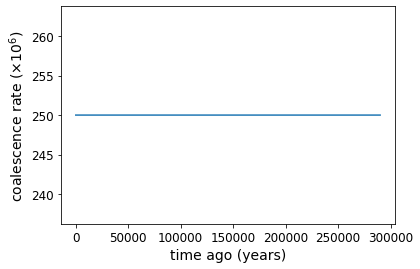

In [27]:
mss_R,_,T = get_crt(mss_g,"Split1")

plt.plot(T*29, mss_R*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);

plt.savefig("Split_R.pdf")

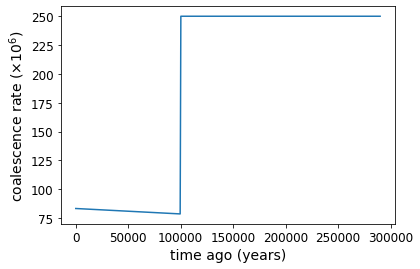

In [28]:
mss_R_cp,_,T = get_crt_croosspop(mss_g,"Split1","Split2")

plt.plot(T*29, mss_R_cp*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);

plt.savefig("split_R_cp.pdf")

#### Deep split at 200k

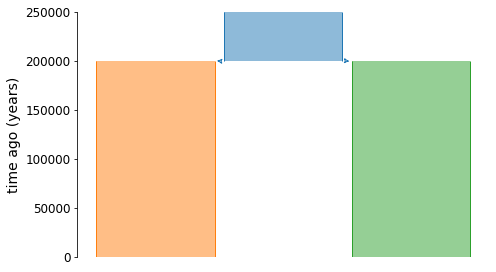

In [29]:
### Deep split at 200k
mds = demes.Builder(time_units="years",generation_time=29)
mds.add_deme("Ancestral",epochs=[dict(start_size=N_ancestral, end_time=200e3)])
mds.add_deme("Split1",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral)])
mds.add_deme("Split2",ancestors=["Ancestral"],start_time=200e3,epochs=[dict(start_size=N_ancestral)])

mds_g = mds.resolve()
p = demesdraw.tubes(mds_g, log_time=False, num_lines_per_migration=3,labels=None)
p.tick_params(labelsize=12)
p.yaxis.get_label().set_fontsize(14)

p.figure.savefig("Deep_split.pdf")

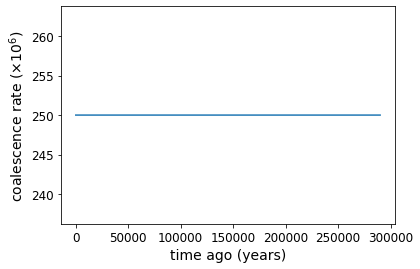

In [30]:
mds_R,_,T = get_crt(mds_g,"Split1")

plt.plot(T*29, mds_R*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);


plt.savefig("Deep_split_R.pdf")

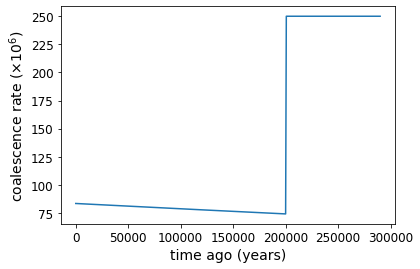

In [31]:
mds_R_cp,_,T = get_crt_croosspop(mds_g,"Split1","Split2")

plt.plot(T*29, mds_R_cp*10e6)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"coalescence rate ($\times 10^6$)",fontsize = 14);

plt.savefig("Deep_split_R_cp.pdf")